# Chap 1: Experiment 1

## Training a NN with a single hidden layer

This notebook trains a NN with a single hidden layer and outputs some metrics such as the train and validation set accuracies.

In [9]:
# Setup logging
import logging
from digit_classifier import base, DigitClassifier, DEVICE, Metrics, DigitClassifierConfig
import torch.nn as nn
import torch
import numpy as np
from pathlib import Path
import pickle

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.animation as ani
import seaborn as sns

sns.set_theme()

sns.set_theme()

In [2]:
base() # Set seeds

In [3]:
# Model parameters
config = DigitClassifierConfig(
	sizes=[784, 30, 10],
	learning_rate=3,
  device=DEVICE,
  loss = nn.MSELoss(reduction='mean'),
  mini_batch = 10,
)

model_dir = Path("../resources/model/chap1/hidden_layer_mse/")
metrics_dir = model_dir / 'metrics.pkl'

## Train model

Note: this section can be skipped if model has already been trained

In [4]:
# Instantiate model for training
model = DigitClassifier(config)
model

[digit_classifier] [INFO] Train size: 60000
[digit_classifier] [INFO] Test size: 10000
[digit_classifier] [INFO] Train set: 50000
[digit_classifier] [INFO] Valid set: 10000


DigitClassifier(
  (act_fn): Sigmoid()
  (linears): ModuleList(
    (0): Linear(in_features=784, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=10, bias=True)
  )
  (loss_module): MSELoss()
)

In [5]:
epochs = 10
metrics = Metrics()
model.train_loop(num_epochs=epochs, metrics=metrics)

[digit_classifier] [INFO] Epoch: 0: 9190.0 / 10000
[digit_classifier] [INFO] Epoch: 1: 9324.0 / 10000
[digit_classifier] [INFO] Epoch: 2: 9398.0 / 10000
[digit_classifier] [INFO] Epoch: 3: 9413.0 / 10000
[digit_classifier] [INFO] Epoch: 4: 9468.0 / 10000
[digit_classifier] [INFO] Epoch: 5: 9494.0 / 10000
[digit_classifier] [INFO] Epoch: 6: 9504.0 / 10000
[digit_classifier] [INFO] Epoch: 7: 9527.0 / 10000
[digit_classifier] [INFO] Epoch: 8: 9523.0 / 10000
[digit_classifier] [INFO] Epoch: 9: 9541.0 / 10000


In [7]:
# Save model
model.save_model(model_dir)

# Save metrics
with open(metrics_dir, 'wb')  as f:
  pickle.dump(metrics, f)

## Load data from checkpoint

If model has been trained before, you can skip here

In [4]:
# Load model
model = DigitClassifier.load_model(model_dir)

# Load metrics
with open(metrics_dir, 'rb') as f:
  metrics: Metrics = pickle.load(f)

[digit_classifier] [INFO] Train size: 60000
[digit_classifier] [INFO] Test size: 10000
[digit_classifier] [INFO] Train set: 50000
[digit_classifier] [INFO] Valid set: 10000


In [5]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    ret[:n-1] = a[:n-1]
    ret[n-1:] /= n
    return ret
    # return ret[n - 1:] / n
moving_average(np.arange(20))

array([ 0.,  1.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
       12., 13., 14., 15., 16., 17., 18.])

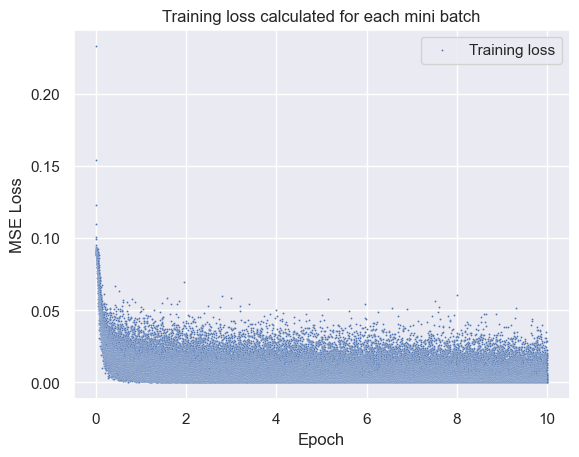

In [6]:
# Plot train loss (per batch)
x_epochs = np.arange(len(metrics.train_batch_loss)) / len(model.train_dataloader)
ax = sns.scatterplot(x=x_epochs, y=metrics.train_batch_loss, s=2, label="Training loss", legend="auto")
# sns.scatterplot(x = x_epochs, y=moving_average(train_loss_metrics, n=len(model.train_dataloader)))
ax.set_xlabel("Epoch")
ax.set_ylabel("MSE Loss")
ax.set_title("Training loss calculated for each mini batch")
plt.show()

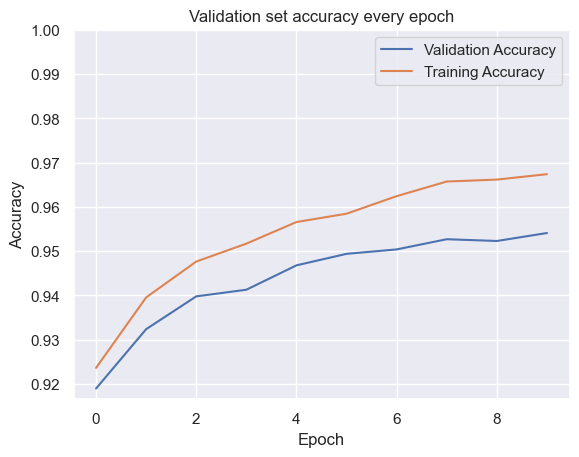

In [7]:
# Plot training and validation accuracy per epoch
ax = sns.lineplot(metrics.valid_precision_epoch,
                     label="Validation Accuracy")
sns.lineplot(metrics.train_precision_epoch, label="Training Accuracy")
ax.set_ylim(None, 1)
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_title("Validation set accuracy every epoch")
plt.show()

## Visualise the weights in the first layer

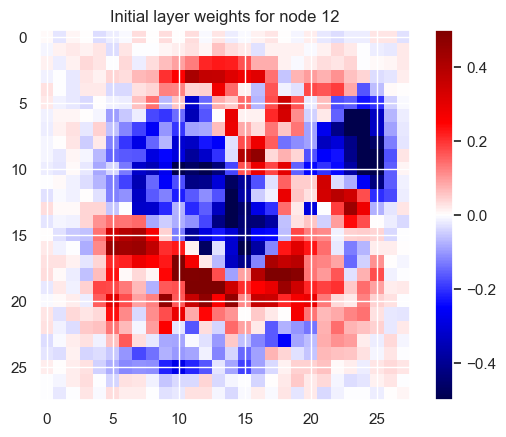

In [24]:
# Visualise the weights in the first layer
img_size = (28,28)
idx = 12
w = model.layer_weights(0, idx).numpy().reshape(*img_size)

bound = 0.5
norm = cm.colors.Normalize(vmax=bound, vmin=-bound)

fig, ax = plt.subplots()
ax.set_title(f"Initial layer weights for node {idx}")
im = ax.imshow(w, cmap=mpl.colormaps['seismic'], norm=norm)
fig.colorbar(im, ax=ax)
plt.show()

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


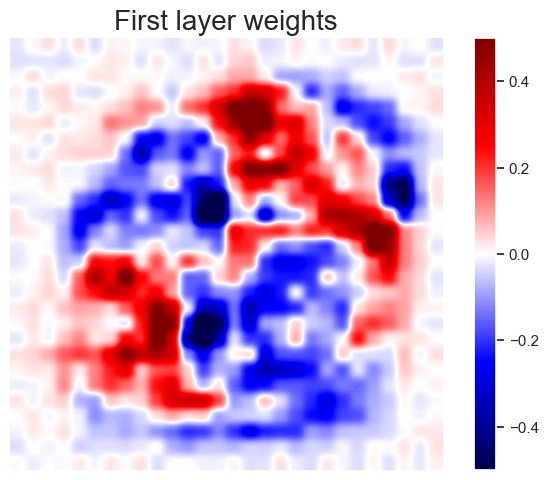

In [27]:
# Animate the weights
fps = 2
fig, ax = plt.subplots()
fig.subplots_adjust(left=0, bottom=0.02, right=1, top=1 -
                    0.08, wspace=None, hspace=None)

im = ax.imshow(w, cmap=mpl.colormaps['seismic'], norm=norm, interpolation='kaiser')
# ax.set_title("First layer weights")
# ax.set_axis('off')
ax.set_axis_off()
fig.colorbar(im, ax=ax)
ax.set_title(f"First layer weights", fontsize=20)


def next_ani(i):
  w = model.layer_weights(0, i).numpy().reshape(*img_size)
  im.set_array(w)
  return im,


anim = ani.FuncAnimation(fig, next_ani, frames=30, interval=1000)
anim.save('../resources/figures/digit_weights_hidden.gif')

### Is there a way to visualise an _overall_ combination of weights frmo the img?

In [25]:
# Find the weights for the digits

model.layer_weights(1, 0)

tensor([ 2.7762, -1.3303,  0.2896, -2.7756, -0.2499, -1.5016, -1.5013,  0.3593,
        -1.0510,  1.1433,  0.3587,  1.1407,  1.7043, -0.9848, -2.2510,  0.0655,
         1.7081, -2.2367,  1.3558, -0.7062, -1.4688, -2.7271, -2.9796, -1.1201,
        -1.8012, -0.4443, -1.1011,  0.3390,  0.8323, -0.7115])